In [5]:
#camera access for laptop 

import cv2

def turn_on_camera():
    # Turn on the system camera (open the video capture)
    cap = cv2.VideoCapture(0)  # '0' is the default webcam, change it if you have multiple cameras

    if not cap.isOpened():
        print("Error: Camera could not be opened.")
        return None
    
    print("Camera is now ON")

    while True:
        ret, frame = cap.read()

        if not ret:
            print("Failed to grab frame")
            break

        # Display the camera feed
        cv2.imshow('Camera Feed', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Turning off the camera...")
            break

    # Turn off the camera (release the capture)
    cap.release()
    cv2.destroyAllWindows()

def turn_off_camera():
    # You can simulate turning off by releasing the camera capture object
    print("Camera is now OFF")

# Usage
turn_on_camera()  # This will turn on the camera and display the feed

# You can call `turn_off_camera()` after closing the feed with 'q', but it's not necessary


Camera is now ON
Turning off the camera...


In [6]:
#to capture Image

import cv2

def capture_image():
    # Open the default camera (camera 0)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Camera could not be opened.")
        return

    print("Press 'c' or spacebar to capture an image. Press 'q' to quit.")

    while True:
        # Capture frame-by-frame from the camera feed
        ret, frame = cap.read()

        if not ret:
            print("Failed to grab frame")
            break

        # Display the resulting frame
        cv2.imshow('Live Camera', frame)

        # Wait for the user's keypress
        key = cv2.waitKey(1) & 0xFF

        # If 'c' or spacebar is pressed, capture the image
        if key == ord('c') or key == 32:  # 32 is the ASCII code for spacebar
            img_name = "captured_image.png"
            cv2.imwrite(img_name, frame)  # Save the image as a PNG file
            print(f"Image captured and saved as {img_name}")

        # If 'q' is pressed, quit the loop
        elif key == ord('q'):
            print("Exiting...")
            break

    # Release the camera and close the window
    cap.release()
    cv2.destroyAllWindows()

# Call the function to capture an image
capture_image()


Press 'c' or spacebar to capture an image. Press 'q' to quit.
Image captured and saved as captured_image.png
Image captured and saved as captured_image.png
Image captured and saved as captured_image.png
Image captured and saved as captured_image.png
Image captured and saved as captured_image.png
Image captured and saved as captured_image.png
Image captured and saved as captured_image.png
Exiting...


In [10]:
#camera access and capturing the image mulitple times 

import cv2
import time

# Initialize the video capture (0 is usually the default camera)
cap = cv2.VideoCapture(0)

img_counter = 0  # Counter to create unique image file names

while True:
    # Capture the video frame-by-frame
    ret, frame = cap.read()

    # Display the resulting frame
    cv2.imshow('Press Space or c to capture image', frame)

    # Wait for a key press (1ms delay between frames)
    key = cv2.waitKey(1) & 0xFF

    # If 'c' or spacebar is pressed, capture the image
    if key == ord('c') or key == 32:  # 32 is the ASCII code for spacebar
        img_name = f"captured_image_{img_counter}.png"
        cv2.imwrite(img_name, frame)  # Save the image as a PNG file
        print(f"Image captured and saved as {img_name}")
        img_counter += 1  # Increment the counter for unique file names

    # If 'q' is pressed, exit the loop
    if key == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


Image captured and saved as captured_image_0.png
Image captured and saved as captured_image_1.png


In [10]:
# camera Access and storing the image in database 

import cv2
import sqlite3
import numpy as np

# Function to convert image to binary
def convert_to_binary(image):
    return image.tobytes()

# Initialize the video capture
cap = cv2.VideoCapture(0)

# Connect to the SQLite database (or create it)
conn = sqlite3.connect('images.db')
cursor = conn.cursor()

# Create a table to store images if it doesn't exist
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Images (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        image BLOB NOT NULL
    )
''')

while True:
    # Capture the video frame-by-frame
    ret, frame = cap.read()

    # Display the resulting frame
    cv2.imshow('Press Space or c to capture image', frame)

    # Wait for a key press (1ms delay between frames)
    key = cv2.waitKey(1) & 0xFF

    # If 'c' or spacebar is pressed, capture the image
    if key == ord('c') or key == 32:  # 32 is the ASCII code for spacebar
        # Convert the image to binary
        img_binary = convert_to_binary(frame)

        # Insert the image into the database
        cursor.execute('INSERT INTO Images (image) VALUES (?)', (img_binary,))
        conn.commit()  # Commit the changes
        print("Image captured and saved in the database.")

    # If 'q' is pressed, exit the loop
    if key == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
conn.close()  # Close the database connection
cv2.destroyAllWindows()


Image captured and saved in the database.


In [11]:
#to get the image from Database 

# Function to convert binary data back to an image
def convert_from_binary(binary_data, width, height, channels):
    return np.frombuffer(binary_data, dtype=np.uint8).reshape((height, width, channels))

# Connect to the SQLite database
conn = sqlite3.connect('images.db')
cursor = conn.cursor()

# Query to retrieve all images from the database
cursor.execute('SELECT image FROM Images')
images = cursor.fetchall()

# Loop through the images retrieved from the database
for idx, img_data in enumerate(images):
    # Retrieve the binary data of the image
    binary_image = img_data[0]
    
    # Assuming the images have a specific resolution (e.g., 640x480 with 3 color channels)
    # You may need to adjust the width, height, and channels based on your specific use case
    width, height, channels = 640, 480, 3

    # Convert the binary data back to an image
    img = convert_from_binary(binary_image, width, height, channels)

    # Display the image in a window
    cv2.imshow(f"Image {idx+1}", img)
    cv2.waitKey(0)  # Wait for a key press to show the next image

# Close all OpenCV windows
cv2.destroyAllWindows()

# Close the database connection
conn.close()


In [4]:
import cv2
import numpy as np

# Function to detect the A4 sheet and return if detected
def detect_a4_sheet(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Blur the frame slightly to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over the contours to find a rectangle (A4 paper should be a quadrilateral)
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # If the approximated contour has 4 points, we assume it's a rectangle (quadrilateral)
        if len(approx) == 4:
            # Draw the contour on the frame (optional)
            cv2.drawContours(frame, [approx], -1, (0, 255, 0), 4)

            # Get the coordinates of the 4 corners
            points = approx.reshape(4, 2)

            # Optionally, you can sort and perform perspective transform for a flat view
            rect = np.zeros((4, 2), dtype="float32")
            s = points.sum(axis=1)
            rect[0] = points[np.argmin(s)]  # Top-left
            rect[2] = points[np.argmax(s)]  # Bottom-right
            diff = np.diff(points, axis=1)
            rect[1] = points[np.argmin(diff)]  # Top-right
            rect[3] = points[np.argmax(diff)]  # Bottom-left

            # Draw the points (optional) to visualize the corners
            for (x, y) in rect:
                cv2.circle(frame, (int(x), int(y)), 5, (0, 0, 255), -1)

            return frame, True  # Return the frame and True if an A4 sheet is detected

    return frame, False  # Return the original frame and False if no A4 sheet is detected

# Capture video from the webcam (or a recorded video)
cap = cv2.VideoCapture(0)  # Use '0' for webcam, or provide a file path for a recorded video

image_captured = False  # Variable to track if an image has been captured

while True:
    # Read a frame from the video stream
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture frame. Exiting.")
        break

    # Detect A4 sheet in the current frame
    processed_frame, a4_detected = detect_a4_sheet(frame)

    # Display the processed frame with the detected A4 sheet
    cv2.imshow('A4 Sheet Detection', processed_frame)

    # If an A4 sheet is detected and an image hasn't been captured yet
    if a4_detected and not image_captured:
        # Save the current frame as an image file
        cv2.imwrite('a4_sheet_captured.png', frame)
        print("A4 sheet detected and image captured.")
        image_captured = True  # Set the flag to True so we don't capture multiple images

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any open windows
cap.release()
cv2.destroyAllWindows()


A4 sheet detected and image captured.


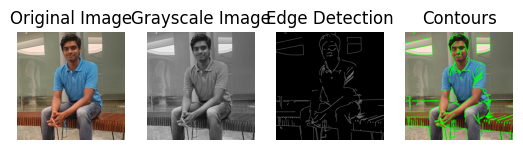

Number of contours found: 137
Contour 1: Area = 3.0, Perimeter = 42.14213538169861
Contour 2: Area = 3.0, Perimeter = 73.79898953437805
Contour 3: Area = 0.5, Perimeter = 87.55634891986847
Contour 4: Area = 1.0, Perimeter = 91.11269783973694
Contour 5: Area = 14.5, Perimeter = 333.7228693962097
Contour 6: Area = 15.5, Perimeter = 345.17871284484863
Contour 7: Area = 11.5, Perimeter = 239.78174448013306
Contour 8: Area = 0.0, Perimeter = 148.7695517539978
Contour 9: Area = 7.5, Perimeter = 59.6984840631485
Contour 10: Area = 4.0, Perimeter = 21.313708305358887
Contour 11: Area = 1.5, Perimeter = 46.72792184352875
Contour 12: Area = 1.0, Perimeter = 100.97056245803833
Contour 13: Area = 33.0, Perimeter = 123.25483322143555
Contour 14: Area = 1.0, Perimeter = 19.656854152679443
Contour 15: Area = 3.5, Perimeter = 46.72792184352875
Contour 16: Area = 15.5, Perimeter = 287.9238793849945
Contour 17: Area = 1.5, Perimeter = 106.87005722522736
Contour 18: Area = 4.0, Perimeter = 53.11269760131

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\ramkumar\OneDrive - BI Worldwide\Desktop\hackthon\MRP.jpg")

# Check if the image was loaded successfully
if image is None:
    print("Error loading image.")
    exit()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to the image to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform edge detection using the Canny algorithm
edges = cv2.Canny(blurred_image, 100, 200)

# Find contours in the edge-detected image
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Display original image, grayscale, and contours
def display_images(images, titles):
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Display the images
images = [image, gray_image, edges, image_with_contours]
titles = ['Original Image', 'Grayscale Image', 'Edge Detection', 'Contours']
display_images(images, titles)

# Image analysis: Calculate number of contours (detected objects)
print(f"Number of contours found: {len(contours)}")

# Optionally, calculate the area and perimeter of each contour
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    print(f"Contour {i+1}: Area = {area}, Perimeter = {perimeter}")



In [3]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Function to calculate distance between two points
def calculate_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Function to process the image and detect body size (chest, waist)
def detect_body_size(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not read the image.")
        return None, None

    # Convert the image to RGB as required by MediaPipe
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect landmarks using MediaPipe
    results = pose.process(image_rgb)

    if not results.pose_landmarks:
        print("No pose landmarks detected.")
        return None, None

    landmarks = results.pose_landmarks.landmark

    # Define key points for waist and chest using MediaPipe's landmark indices
    # LEFT_HIP: 23, RIGHT_HIP: 24, LEFT_SHOULDER: 11, RIGHT_SHOULDER: 12
    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

    # Get the width and height of the image to convert normalized coordinates to pixel coordinates
    image_height, image_width, _ = image.shape

    # Convert normalized landmarks to pixel coordinates
    left_hip_pixel = [int(left_hip[0] * image_width), int(left_hip[1] * image_height)]
    right_hip_pixel = [int(right_hip[0] * image_width), int(right_hip[1] * image_height)]
    left_shoulder_pixel = [int(left_shoulder[0] * image_width), int(left_shoulder[1] * image_height)]
    right_shoulder_pixel = [int(right_shoulder[0] * image_width), int(right_shoulder[1] * image_height)]

    # Calculate the pixel distance for waist and chest
    waist_pixel_distance = calculate_distance(left_hip_pixel, right_hip_pixel)
    chest_pixel_distance = calculate_distance(left_shoulder_pixel, right_shoulder_pixel)

    # Example: Assume a reference object (e.g., a known object like an A4 paper or ruler in the image)
    # Real-world distance in centimeters (this is an assumed value, use a real measurement in practice)
    known_real_world_distance_cm = 10  # e.g., 10 cm reference object in the image

    # Example pixel distance of known real-world object (calculate based on image)
    known_pixel_distance = 50  # Example pixel length of the known object (adjust as per your setup)

    # Calculate pixels per cm
    pixels_per_cm = known_pixel_distance / known_real_world_distance_cm

    # Convert pixel distances to real-world distances (in cm)
    waist_cm = waist_pixel_distance / pixels_per_cm
    chest_cm = chest_pixel_distance / pixels_per_cm

    print(f"Waist: {waist_cm:.2f} cm")
    print(f"Chest: {chest_cm:.2f} cm")

    # Draw lines on the image for visualization
    cv2.line(image, tuple(left_hip_pixel), tuple(right_hip_pixel), (0, 255, 0), 2)
    cv2.line(image, tuple(left_shoulder_pixel), tuple(right_shoulder_pixel), (255, 0, 0), 2)

    # Show the image with lines
    cv2.imshow('Body Size Detection', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return waist_cm, chest_cm

# Example usage
image_path = r"C:\Users\ramkumar\OneDrive - BI Worldwide\Desktop\hackthon\MRP.jpg"
waist, chest = detect_body_size(image_path)
print(f"Detected Waist: {waist} cm, Detected Chest: {chest} cm")


c:\Users\ramkumar\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Waist: 20.44 cm
Chest: 35.28 cm
Detected Waist: 20.43526363911168 cm, Detected Chest: 35.27548723972498 cm


In [2]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Function to calculate distance between two points
def calculate_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Function to process the image and detect body size (chest, waist)
def detect_body_size(frame):
    # Convert the frame to RGB as required by MediaPipe
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect landmarks using MediaPipe
    results = pose.process(image_rgb)

    if not results.pose_landmarks:
        print("No pose landmarks detected.")
        return None, None

    landmarks = results.pose_landmarks.landmark

    # Define key points for waist and chest using MediaPipe's landmark indices
    # LEFT_HIP: 23, RIGHT_HIP: 24, LEFT_SHOULDER: 11, RIGHT_SHOULDER: 12
    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

    # Get the width and height of the frame to convert normalized coordinates to pixel coordinates
    frame_height, frame_width, _ = frame.shape

    # Convert normalized landmarks to pixel coordinates
    left_hip_pixel = [int(left_hip[0] * frame_width), int(left_hip[1] * frame_height)]
    right_hip_pixel = [int(right_hip[0] * frame_width), int(right_hip[1] * frame_height)]
    left_shoulder_pixel = [int(left_shoulder[0] * frame_width), int(left_shoulder[1] * frame_height)]
    right_shoulder_pixel = [int(right_shoulder[0] * frame_width), int(right_shoulder[1] * frame_height)]

    # Calculate the pixel distance for waist and chest
    waist_pixel_distance = calculate_distance(left_hip_pixel, right_hip_pixel)
    chest_pixel_distance = calculate_distance(left_shoulder_pixel, right_shoulder_pixel)

    # Example: Assume a reference object (e.g., a known object like an A4 paper or ruler in the image)
    known_real_world_distance_cm = 10  # 10 cm as an example
    known_pixel_distance = 50  # Example pixel distance (adjust based on reference object)

    # Calculate pixels per cm
    pixels_per_cm = known_pixel_distance / known_real_world_distance_cm

    # Convert pixel distances to real-world distances (in cm)
    waist_cm = waist_pixel_distance / pixels_per_cm
    chest_cm = chest_pixel_distance / pixels_per_cm

    print(f"Waist: {waist_cm:.2f} cm")
    print(f"Chest: {chest_cm:.2f} cm")

    # Draw lines on the frame for visualization
    cv2.line(frame, tuple(left_hip_pixel), tuple(right_hip_pixel), (0, 255, 0), 2)  # Waist
    cv2.line(frame, tuple(left_shoulder_pixel), tuple(right_shoulder_pixel), (255, 0, 0), 2)  # Chest

    return waist_cm, chest_cm, frame

def main():
    # Initialize the camera
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open the camera.")
        return

    while True:
        # Capture frame-by-frame from the camera
        ret, frame = cap.read()

        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Process the captured frame to detect body size
        waist, chest, frame_with_lines = detect_body_size(frame)

        if waist is not None and chest is not None:
            print(f"Detected Waist: {waist:.2f} cm, Detected Chest: {chest:.2f} cm")

        # Display the resulting frame with body measurements
        cv2.imshow('Body Size Detection', frame_with_lines)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close all windows
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


No pose landmarks detected.


ValueError: not enough values to unpack (expected 3, got 2)

In [4]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Function to calculate distance between two points
def calculate_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Function to process the image and detect body size (chest, waist)
def detect_body_size(frame):
    # Convert the frame to RGB as required by MediaPipe
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect landmarks using MediaPipe
    results = pose.process(image_rgb)

    if not results.pose_landmarks:
        print("No pose landmarks detected.")
        return None, None, frame  # Return the frame even if no landmarks are detected

    landmarks = results.pose_landmarks.landmark

    # Define key points for waist and chest using MediaPipe's landmark indices
    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

    # Get the width and height of the frame to convert normalized coordinates to pixel coordinates
    frame_height, frame_width, _ = frame.shape

    # Convert normalized landmarks to pixel coordinates
    left_hip_pixel = [int(left_hip[0] * frame_width), int(left_hip[1] * frame_height)]
    right_hip_pixel = [int(right_hip[0] * frame_width), int(right_hip[1] * frame_height)]
    left_shoulder_pixel = [int(left_shoulder[0] * frame_width), int(left_shoulder[1] * frame_height)]
    right_shoulder_pixel = [int(right_shoulder[0] * frame_width), int(right_shoulder[1] * frame_height)]

    # Calculate the pixel distance for waist and chest
    waist_pixel_distance = calculate_distance(left_hip_pixel, right_hip_pixel)
    chest_pixel_distance = calculate_distance(left_shoulder_pixel, right_shoulder_pixel)

    # Example: Assume a reference object (e.g., a known object like an A4 paper or ruler in the image)
    known_real_world_distance_cm = 10  # 10 cm as an example
    known_pixel_distance = 50  # Example pixel distance (adjust based on reference object)

    # Calculate pixels per cm
    pixels_per_cm = known_pixel_distance / known_real_world_distance_cm

    # Convert pixel distances to real-world distances (in cm)
    waist_cm = waist_pixel_distance / pixels_per_cm
    chest_cm = chest_pixel_distance / pixels_per_cm

    print(f"Waist: {waist_cm:.2f} cm")
    print(f"Chest: {chest_cm:.2f} cm")

    # Draw lines on the frame for visualization
    cv2.line(frame, tuple(left_hip_pixel), tuple(right_hip_pixel), (0, 255, 0), 2)  # Waist
    cv2.line(frame, tuple(left_shoulder_pixel), tuple(right_shoulder_pixel), (255, 0, 0), 2)  # Chest

    return waist_cm, chest_cm, frame

def main():
    # Initialize the camera
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open the camera.")
        return

    while True:
        # Capture frame-by-frame from the camera
        ret, frame = cap.read()

        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Process the captured frame to detect body size
        waist, chest, frame_with_lines = detect_body_size(frame)

        if waist is not None and chest is not None:
            print(f"Detected Waist: {waist:.2f} cm, Detected Chest: {chest:.2f} cm")

        # Display the resulting frame with body measurements
        cv2.imshow('Body Size Detection', frame_with_lines)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close all windows
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Waist: 29.01 cm
Chest: 46.01 cm
Detected Waist: 29.01 cm, Detected Chest: 46.01 cm
Waist: 30.01 cm
Chest: 45.49 cm
Detected Waist: 30.01 cm, Detected Chest: 45.49 cm
Waist: 29.81 cm
Chest: 44.55 cm
Detected Waist: 29.81 cm, Detected Chest: 44.55 cm
Waist: 31.22 cm
Chest: 45.54 cm
Detected Waist: 31.22 cm, Detected Chest: 45.54 cm
Waist: 29.47 cm
Chest: 42.88 cm
Detected Waist: 29.47 cm, Detected Chest: 42.88 cm
Waist: 30.00 cm
Chest: 45.43 cm
Detected Waist: 30.00 cm, Detected Chest: 45.43 cm
Waist: 31.00 cm
Chest: 46.77 cm
Detected Waist: 31.00 cm, Detected Chest: 46.77 cm
Waist: 29.80 cm
Chest: 44.66 cm
Detected Waist: 29.80 cm, Detected Chest: 44.66 cm
Waist: 29.82 cm
Chest: 43.49 cm
Detected Waist: 29.82 cm, Detected Chest: 43.49 cm
Waist: 30.01 cm
Chest: 44.02 cm
Detected Waist: 30.01 cm, Detected Chest: 44.02 cm
Waist: 29.21 cm
Chest: 43.53 cm
Detected Waist: 29.21 cm, Detected Chest: 43.53 cm
Waist: 29.42 cm
Chest: 43.89 cm
Detected Waist: 29.42 cm, Detected Chest: 43.89 cm
Wais

In [5]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Function to calculate distance between two points
def calculate_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Function to process the image and detect body size (chest, waist, shoulder)
def detect_body_size(frame):
    # Convert the frame to RGB as required by MediaPipe
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect landmarks using MediaPipe
    results = pose.process(image_rgb)

    if not results.pose_landmarks:
        print("No pose landmarks detected.")
        return None, None, None, frame  # Return the frame even if no landmarks are detected

    landmarks = results.pose_landmarks.landmark

    # Define key points for waist, chest, and shoulder using MediaPipe's landmark indices
    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

    # Get the width and height of the frame to convert normalized coordinates to pixel coordinates
    frame_height, frame_width, _ = frame.shape

    # Convert normalized landmarks to pixel coordinates
    left_hip_pixel = [int(left_hip[0] * frame_width), int(left_hip[1] * frame_height)]
    right_hip_pixel = [int(right_hip[0] * frame_width), int(right_hip[1] * frame_height)]
    left_shoulder_pixel = [int(left_shoulder[0] * frame_width), int(left_shoulder[1] * frame_height)]
    right_shoulder_pixel = [int(right_shoulder[0] * frame_width), int(right_shoulder[1] * frame_height)]

    # Calculate the pixel distance for waist, chest, and shoulder
    waist_pixel_distance = calculate_distance(left_hip_pixel, right_hip_pixel)
    chest_pixel_distance = calculate_distance(left_shoulder_pixel, right_shoulder_pixel)
    shoulder_pixel_distance = calculate_distance(left_shoulder_pixel, right_shoulder_pixel)

    # Example: Assume a reference object (e.g., a known object like an A4 paper or ruler in the image)
    known_real_world_distance_cm = 10  # 10 cm as an example
    known_pixel_distance = 50  # Example pixel distance (adjust based on reference object)

    # Calculate pixels per cm
    pixels_per_cm = known_pixel_distance / known_real_world_distance_cm

    # Convert pixel distances to real-world distances (in cm)
    waist_cm = waist_pixel_distance / pixels_per_cm
    chest_cm = chest_pixel_distance / pixels_per_cm
    shoulder_cm = shoulder_pixel_distance / pixels_per_cm

    print(f"Waist: {waist_cm:.2f} cm")
    print(f"Chest: {chest_cm:.2f} cm")
    print(f"Shoulder: {shoulder_cm:.2f} cm")

    # Draw lines on the frame for visualization
    cv2.line(frame, tuple(left_hip_pixel), tuple(right_hip_pixel), (0, 255, 0), 2)  # Waist
    cv2.line(frame, tuple(left_shoulder_pixel), tuple(right_shoulder_pixel), (255, 0, 0), 2)  # Chest

    return waist_cm, chest_cm, shoulder_cm, frame

def main():
    # Initialize the camera
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open the camera.")
        return

    while True:
        # Capture frame-by-frame from the camera
        ret, frame = cap.read()

        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Display the current frame
        cv2.imshow('Press Space or c to Capture, q to Quit', frame)

        # Wait for key press
        key = cv2.waitKey(1) & 0xFF

        # If 'c' or spacebar is pressed, capture the image and calculate the measurements
        if key == ord('c') or key == 32:  # 32 is the ASCII code for spacebar
            waist, chest, shoulder, frame_with_lines = detect_body_size(frame)

            if waist is not None and chest is not None and shoulder is not None:
                print(f"Detected Waist: {waist:.2f} cm, Detected Chest: {chest:.2f} cm, Detected Shoulder: {shoulder:.2f} cm")

            # Display the resulting frame with body measurements
            cv2.imshow('Body Size Detection', frame_with_lines)

        # If 'q' is pressed, exit the loop
        if key == ord('q'):
            break

    # Release the camera and close all windows
    cap.release()
    cv2.destroyAllWindows()

    main()


Waist: 37.20 cm
Chest: 54.81 cm
Shoulder: 54.81 cm
Detected Waist: 37.20 cm, Detected Chest: 54.81 cm, Detected Shoulder: 54.81 cm
Waist: 28.40 cm
Chest: 48.80 cm
Shoulder: 48.80 cm
Detected Waist: 28.40 cm, Detected Chest: 48.80 cm, Detected Shoulder: 48.80 cm
No pose landmarks detected.
Waist: 24.21 cm
Chest: 46.67 cm
Shoulder: 46.67 cm
Detected Waist: 24.21 cm, Detected Chest: 46.67 cm, Detected Shoulder: 46.67 cm
